## Data from EQ-evolution

In [1]:
%matplotlib inline

from math import *
import matplotlib
import numpy as np
import matplotlib.transforms as transforms
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pylab
from scipy import interpolate
import os
text_size=26
fig_size_x=24
fig_size_y=14



gev_bg= np.loadtxt("./../output/quintessence_background.dat")
bg= np.loadtxt("./../../EQ_hi_class/output/quin_background.dat")
Hconf_hiclass = interpolate.interp1d(1./(1.+bg[:,0]) ,bg[:,3])


# from numpy import genfromtxt
# bg_alessandro = genfromtxt("./../background_evolution.csv", delimiter=',')
# Hconf_hiclass = interpolate.interp1d(1./(1.+bg[:,0]) ,bg[:,3])


# Checking the values:

In [8]:
rho_cdm = interpolate.interp1d(bg[:,0] ,bg[:,11])
rho_b = interpolate.interp1d(bg[:,0] ,bg[:,10])
rho_ur = interpolate.interp1d(bg[:,0] ,bg[:,12])
rho_g = interpolate.interp1d(bg[:,0] ,bg[:,9])
rho_tot = interpolate.interp1d(bg[:,0] ,bg[:,14])
rho_smg = interpolate.interp1d(bg[:,0] ,bg[:,19])
p_smg = interpolate.interp1d(bg[:,0] ,bg[:,20])

z=100

Omega_smg=rho_smg(z)/rho_tot(z);
Omega_m = (rho_cdm(z)+rho_b(z))/rho_tot(z);
Omega_rad=(rho_ur(z) + rho_g(z))/rho_tot(z);
w_smg = p_smg(z)/rho_smg(z);

print("Omega_smg:", Omega_smg," Omega_m: ",Omega_m, "Omega_rad: ",Omega_rad, " w_smg: ",w_smg)

Omega_smg: 3.325946888184387e-05  Omega_m:  0.9711507188201423 Omega_rad:  0.02881602171116236  w_smg:  -0.7963640632835104


# Background

## Particle horizon

(1e-06, 0.5)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


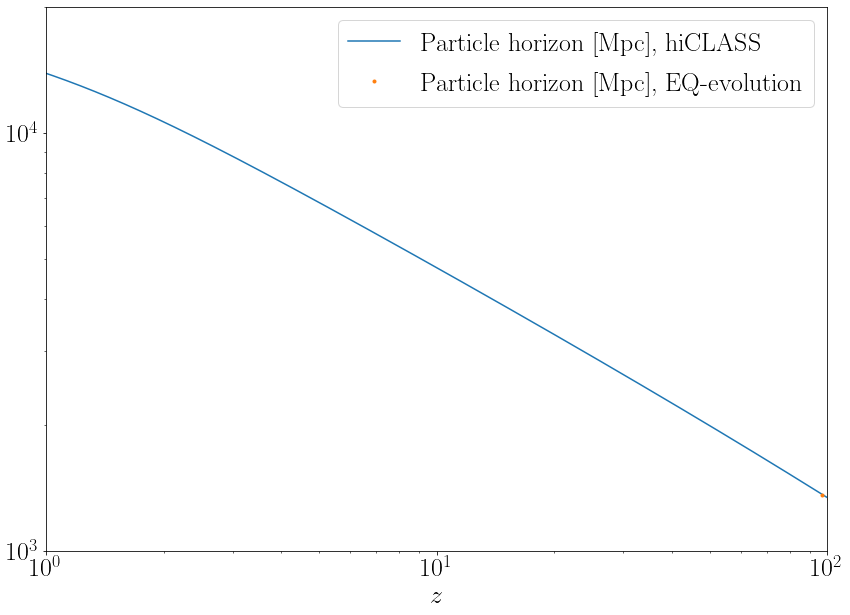

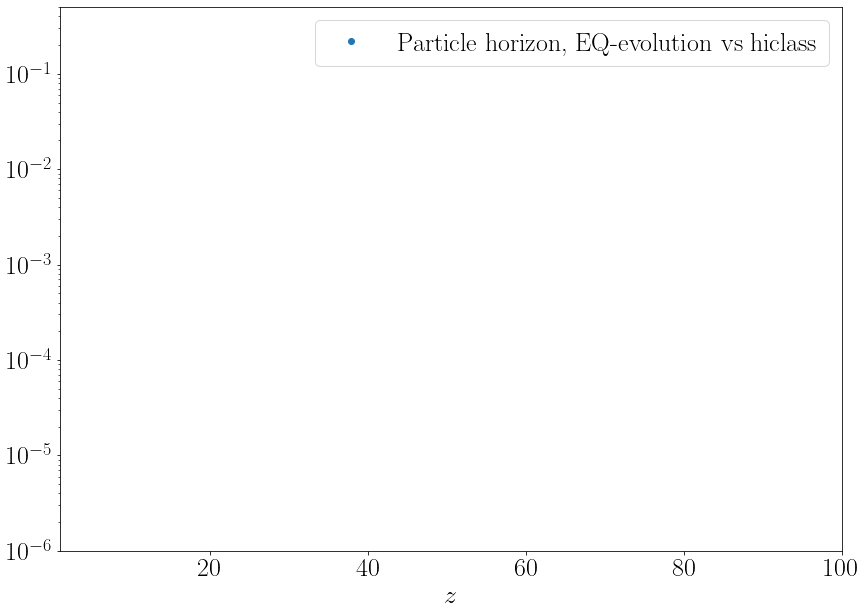

In [2]:

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(14,10))


########hiclass########
# plt.plot(1+bg[:,0],  bg[:,2] * (bg[-1:,3]) , label = "Particle horizon, hiCLASS")
plt.plot(1+bg[:,0],  bg[:,2]  , label = "Particle horizon [Mpc], hiCLASS")

##########gevolution#########
###########################
h=0.67556;
boxsize = 2000.0/h # [Mpc]

plt.plot(1+(1./gev_bg[:,2]-1), gev_bg[:,1]*boxsize ,".", label = "Particle horizon [Mpc], EQ-evolution")


############################
##########Alessnadro#########
############################
# fourpiG_Alessandro = 0.5;
# alessandro_to_hiclass_converion = (np.sqrt(2. * fourpiG_Alessandro/3.));
# alessandro_result = bg_alessandro[:,9] * alessandro_to_hiclass_converion ;
# plt.plot(1+(1./bg_alessandro[:,1]-1), alessandro_result,"-.", label = "Particle horizon, Alessandro")

plt.legend()
# plt.ylabel(r"$$")
plt.xlabel(r"$z$")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,100)
plt.ylim(1.e3,2.e4)



##################################
##################################
##################################

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(14,10))





#####gevolution######
###########################
h=0.67556;
boxsize = 2000.0/h # [Mpc]
hiclass_val = interpolate.interp1d(1+bg[:,0],  bg[:,2]  )

num = -2
rel_diff = np.abs(gev_bg[:num,1]*boxsize/hiclass_val((1./gev_bg[:num,2])) - 1.)

plt.plot(1+(1./gev_bg[:num,2]-1),rel_diff,"o", label = "Particle horizon, EQ-evolution vs hiclass")


#####hiclass######
# num1 = 0
# num = -400
# rel_diff = np.abs(alessandro_result[num1:num]/hiclass_val(1+(1./bg_alessandro[num1:num,1]-1)) - 1.)
# plt.plot(1+(1./bg_alessandro[num1:num,1]-1),rel_diff ,"-.", label = "Particle horizon, Alessandro vs hiclass")

plt.legend()
# plt.ylabel(r"$$")
plt.xlabel(r"$z$")
# plt.xscale('log')
plt.yscale('log')
plt.xlim(1,100)
plt.ylim(1.e-6,0.5)



## Hubble function

(1.0, 1000.0)

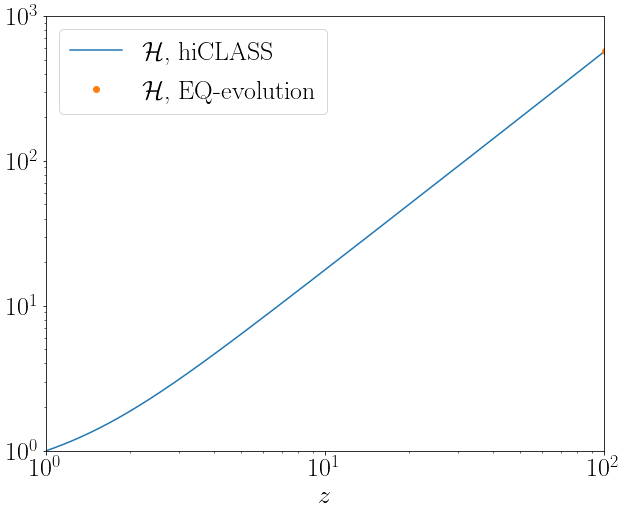

In [3]:

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(10,8))



###### hiclass results:
#     
num = 6
plt.plot(1+bg[:,0], bg[:,3]/bg[-1:,3] , label = "$\mathcal{H}$, hiCLASS")

plt.plot(1+(1./gev_bg[::num,2]-1), gev_bg[::num,3]/gev_bg[::num,2],"o", label = "$\mathcal{H}$, EQ-evolution")

# plt.plot(1+(1./bg_alessandro[:,1]-1), bg_alessandro[:,2]/bg_alessandro[:,1],"-.", label = "$\mathcal{H}$, Alessandro")


    
plt.legend()
# plt.ylabel(r"$$")
plt.xlabel(r"$z$")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,100)
plt.ylim(1.,1.e3)


# Hubble_prime

(-20, 1.0)

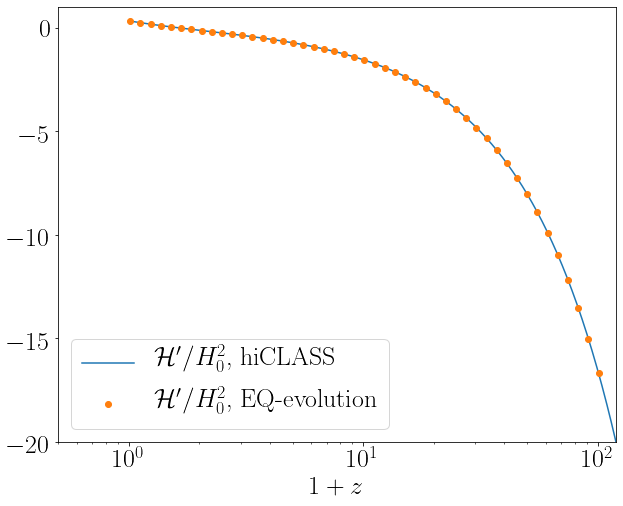

In [359]:

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(10,8))



###### hiclass results:
#     
num = 100
a = 1./(1+bg[:,0]);
H_prime_hiclass = a * bg[:,4]  + a * a * bg[:,3] * bg[:,3]; # H_prime = a * H' + a^2 * H^2 

plt.plot(1+bg[:,0], H_prime_hiclass/bg[-1:,3]/bg[-1:,3], label = "$\mathcal{H}^\prime/H_0^2$, hiCLASS")

plt.plot(1+(1./gev_bg[::num,2]-1), gev_bg[::num,4],"o",label = "$\mathcal{H}'/H_0^2$, EQ-evolution")


# plt.plot(1+(1./bg_alessandro[:,1]-1), -bg_alessandro[:,3]/bg_alessandro[:,1] + bg_alessandro[:,2]**2/bg_alessandro[:,1],"-.", label = "$\mathcal{H}'$, Alessandro")


    
plt.legend()
# plt.ylabel(r"$$")
plt.xlabel(r"$1+z$")
plt.xscale('log')
# plt.yscale('log')
plt.xlim(0.5,120)
plt.ylim(-20,1.e0)


## scalar field and scalar field' and double prime background

(0.003, 1.0)

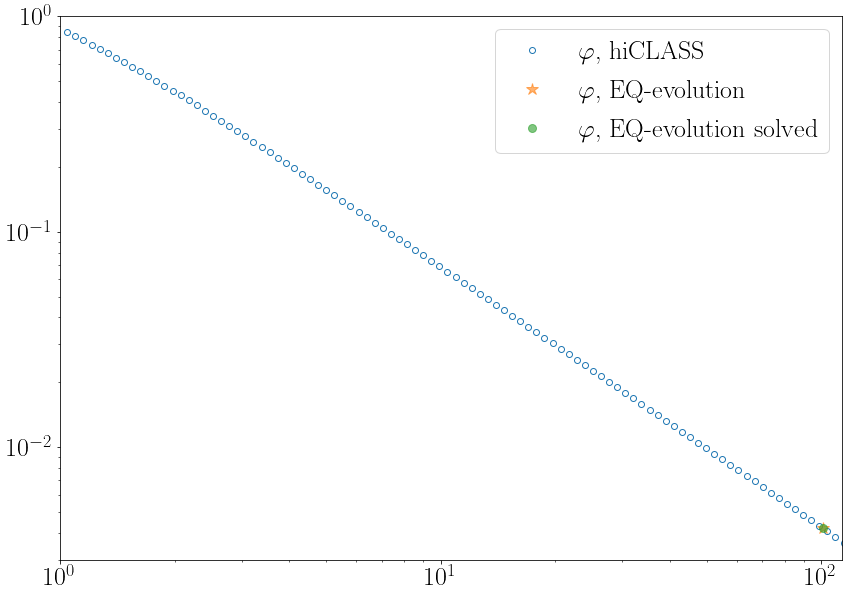

In [4]:

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(14,10))
a_hiclass = 1./(1.+bg[:,0])
Hconf_hiclass = interpolate.interp1d(bg[:,0] ,bg[:,3] * a_hiclass  )


###### hiclass results:
#     
num = 7
plt.plot(1+bg[::num,0], bg[::num,29],"o",alpha=1, mfc='none' , label = "$\\varphi$, hiCLASS")
plt.plot(1+(1./gev_bg[::num,2]-1), gev_bg[::num,5],"*",ms = 12,alpha=0.6, label = "$\\varphi$,  EQ-evolution")
plt.plot(1+(1./gev_bg[::num,2]-1), gev_bg[::num,8],"o",ms = 8,alpha=0.6, label = "$\\varphi$,  EQ-evolution solved")

# plt.plot(1+(1./bg_alessandro[:,1]-1), bg_alessandro[:,10],"-.", label = "$\\varphi$, Alessandro")

plt.legend()
# plt.ylabel(r"$$")

plt.xscale('log')
plt.yscale('log')
plt.xlim(1,113)
plt.ylim(3.e-3,1.e0)


(0.01, 1.0)

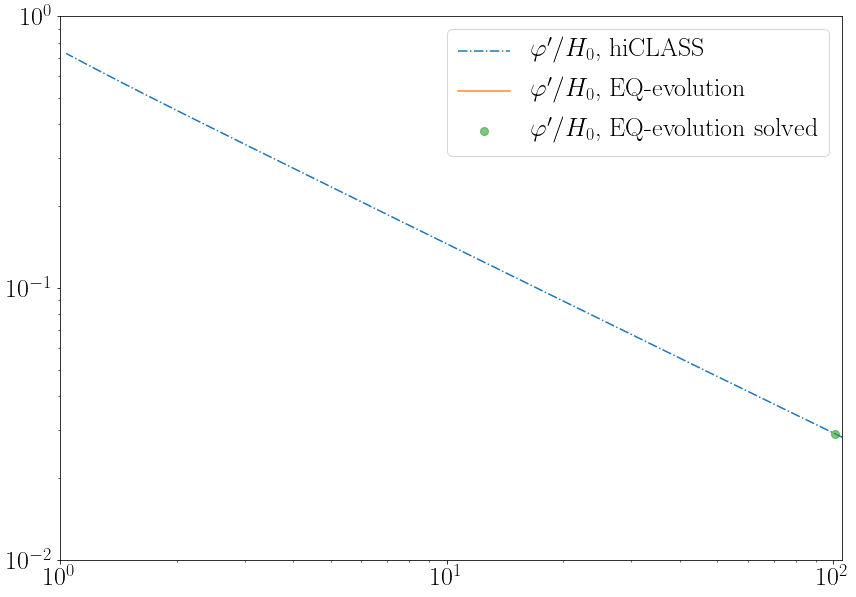

In [5]:

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(14,10))


scalar_p_hiclass = interpolate.interp1d((bg[:,0]), bg[:,29])

###### hiclass results:
#     
h=0.67556
num = 6
plt.plot(1+bg[::num,0],  bg[::num,30]/(bg[-1:,3]),"-." , label = "$\\varphi'/H_0$, hiCLASS")
plt.plot(1+(1./gev_bg[::num,2]-1), gev_bg[::num,6],"-",alpha=0.9, mfc='none', label = "$\\varphi'/H_0$,  EQ-evolution")
plt.plot(1+(1./gev_bg[::num,2]-1), gev_bg[::num,9],"o",ms = 8,alpha=0.6, label = "$\\varphi'/H_0$,  EQ-evolution solved")

    
plt.legend()
# plt.ylabel(r"$$")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,105)
plt.ylim(1.e-2,1.e0)


(0.04, 1.0)

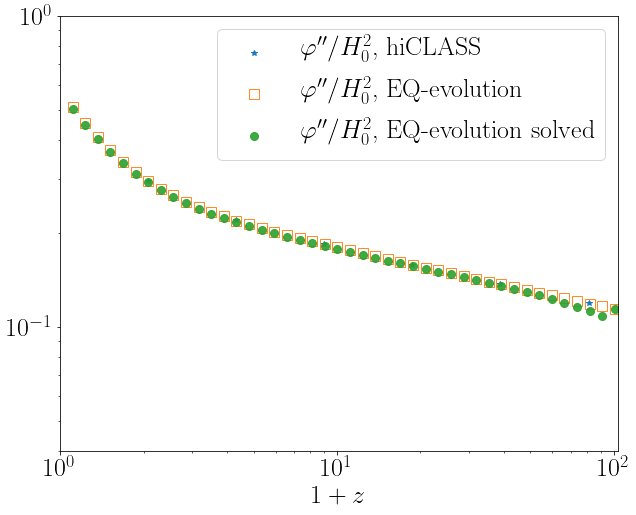

In [352]:

plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : text_size}

matplotlib.rc('font', **font)
plt.figure(figsize=(10,8))

###### hiclass results:
#     
h=0.67556
fourpiG_Alessandro = 0.5;

# plt.plot(1+bg[:,0], bg[:,31]/bg[-1:,3]/bg[-1:,3],"*", label = "$\\varphi''$, hiCLASS")
num = 105
plt.plot(1+bg[::num,0],  bg[::num,31]/(bg[-1:,3]**2),"*" , label = "$\\varphi''/H_0^2$, hiCLASS")
plt.plot(1+(1./gev_bg[::num,2]-1), gev_bg[::num,7],"s",ms=10,alpha=0.9, mfc='none', label = "$\\varphi''/H_0^2$,  EQ-evolution")
plt.plot(1+(1./gev_bg[::num,2]-1), gev_bg[::num,10],"o",ms = 8,alpha=0.9, label = "$\\varphi''/H_0^2$,  EQ-evolution solved")

plt.legend()
plt.xlabel(r"$1+z$")
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,104)
plt.ylim(4.e-2,1.e0)
